# K MEANS CLUSTERING WITH USCIS PERMANENT VISA APPLICATIONS BETWEEN 2011 - 2016

### INTRODUCTION

"A permanent labor certification issued by the Department of Labor (DOL) allows an employer to hire a foreign worker to work permanently in the United States. In most instances, before the U.S. employer can submit an immigration petition to the Department of Homeland Security's U.S. Citizenship and Immigration Services (USCIS), the employer must obtain a certified labor certification application from the DOL's Employment and Training Administration (ETA). The DOL must certify to the USCIS that there are not sufficient U.S. workers able, willing, qualified and available to accept the job opportunity in the area of intended employment and that employment of the foreign worker will not adversely affect the wages and working conditions of similarly employed U.S. workers".** <br>
*For more information: https://www.kaggle.com/jboysen/us-perm-visas

## 1. Exploratory Data Analysis 
###    1.1. Missing values
###    1.2. Overview of cases:
            1.2.1. Case Results
            1.2.2. Application in Years
            1.2.3. Visa Types
            1.2.4. H-1B
###    1.3. General Information:
            1.3.1. States
            1.3.2. Cities
            1.3.3. Sectors
            1.3.4. Companies
###    1.4. Applicants:
            1.4.1. Citizenship
            1.4.2. Education
            1.4.3. Titles
            1.4.4. Salary range
            1.4.5. Payment type


## 2. Modelling
###      2.1. Imputation
###      2.2. Label Endocing
###      2.3. Modeling with K Means Clustering
           2.3.1. K Means Clustering
           2.3.2. Plotting with Two Features
           2.3.3. Silhouette Plot with Two Features

## 1. Exploratory Data Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\ProgramData\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
visa = pd.read_csv("us_perm_visas.csv", low_memory= False, parse_dates=["decision_date", "case_received_date"])

In [4]:
visa.shape

(374362, 154)

In [5]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Columns: 154 entries, add_these_pw_job_title_9089 to wage_offered_unit_of_pay_9089
dtypes: datetime64[ns](2), float64(10), object(142)
memory usage: 439.8+ MB


In [6]:
visa.head(10)

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,PERM,A-07352-06288,NaN,NaT,Denied,EWI,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,PERM,A-07354-06926,NaN,NaT,Certified-Expired,H-1B,...,NaN,NaN,NaN,Educational Services,47084.0,52000.0,yr,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,PERM,A-08004-10147,NaN,NaT,Denied,E-2,...,NaN,NaN,NaN,Advanced Mfg,36733.0,NaN,yr,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,PERM,A-08004-10184,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,IT,44824.0,85000.0,yr,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,PERM,A-08010-11785,NaN,NaT,Denied,E-2,...,NaN,NaN,NaN,Retail,12.86,16.82,hr,NaN,NaN,NaN


It seems there are many missing values. Let's see ratio of missing values in each column

###    1.1. Missing values

In [7]:
missing = pd.DataFrame(columns=["number_of_missing", "missing_ratio"] ,index=visa.columns)

for column in visa.columns:
    
    missing.loc[column][0] = visa[column].isnull().sum()
    missing.loc[column][1] = visa[column].isnull().sum()/len(visa[column])

In [8]:
missing.sort_values(by= "missing_ratio" , axis=0, ascending= False, inplace= True)
missing

,number_of_missing,missing_ratio
orig_file_date,374081,0.999249
orig_case_no,374068,0.999215
recr_info_job_fair_to,372569,0.995211
recr_info_job_fair_from,372564,0.995197
recr_info_on_campus_recr_to,372497,0.995018
recr_info_on_campus_recr_from,372490,0.994999
ji_live_in_dom_svc_contract,371964,0.993594
foreign_worker_info_education_other,370422,0.989475
job_info_training_field,369868,0.987996
job_info_training_num_months,369583,0.987234


Ratios are very high. There is an abrupt decrease between wage_offer_from_9089 and and pw_level_9089. By eyeballing, we can decide 30% threshold value for missing value ratio (Practically, it is same with 7% since missing ratio of pw_level_9089 is 7%). <br>

However, we should be cognizant of the fact that there might be some columns which have high ratio of missing values but might have useful information. If we scrutunize the list above, job_info_job_title, us_economic_sector, foreign_worker_info_education can be other important features.

In [9]:
print("There are", len(missing[missing["missing_ratio"]>0.3]), "columns which have more than 30% missing values")

There are 137 columns which have more than 30% missing values


In [10]:
## Retriving columns that have less than 30% missing value ratio. 

missing[missing["missing_ratio"]<=0.3].index

Index(['pw_level_9089', 'class_of_admission', 'country_of_citizenship',
       'pw_soc_title', 'pw_amount_9089', 'pw_source_name_9089',
       'pw_unit_of_pay_9089', 'pw_soc_code', 'job_info_work_state',
       'job_info_work_city', 'employer_state', 'employer_address_1',
       'employer_postal_code', 'employer_city', 'employer_name',
       'decision_date', 'case_status'],
      dtype='object')

Though these columns have less than 30% missing value ratio, still there are columns that we can drop before exploratory data analysis (EDA). <br>

We will analyze at employer_city and employer_state level so employer_address_1 and employer_postal_code would be too detailed. With that being said, we can also drop job_info_work_city and job_info_work_state. After EDA, we will drop employer_city and will classify the case results at state level. <br>

It seems pw_soc_title and pw_soc_title are similare to job_in_job_title however they are more general and the latter is more specific job decription. We we will drop pw_soc_title and plot job_info_job_title however in the model, we will use pw_soc_code. <br>

pw_source_name_9089 and pw_level_9089 columns are a technical information that we don't need. <br>
A few decriptive information about columns whose names are not self-explanatory: pw_unit_of_pay_9089 is payroll period (hourly payment, monthly salary, annual salary etc). pw_amount_9089 is amount of salary but values have a wide range because of hourly payment vs annual salary. 

In [11]:
## Data set we will analyze

visa_treated = visa[["class_of_admission", "country_of_citizenship", "pw_amount_9089", 
                      "pw_unit_of_pay_9089", "pw_soc_code", "employer_state", "employer_city", 
                      "employer_name", "decision_date", "case_status", "job_info_job_title", 
                      "us_economic_sector", "foreign_worker_info_education"]]

In [12]:
print("The original data set is ",visa.shape, " and the treated data set is ",visa_treated.shape)

The original data set is  (374362, 154)  and the treated data set is  (374362, 13)


###    1.2. Overview of cases:

### 1.2.1. Case Results

Text(0.5,1,'Case Results')

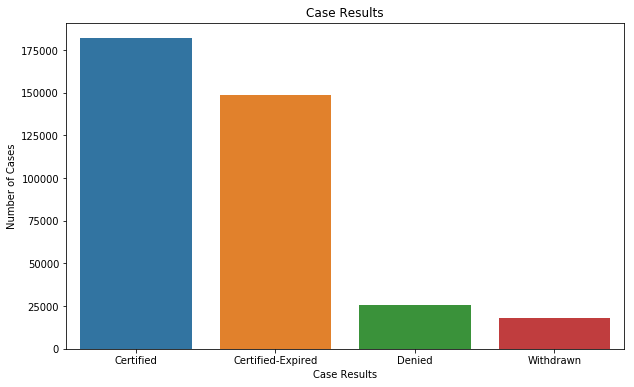

In [13]:
plt.subplots(figsize= (10,6))
sns.countplot(x=visa_treated["case_status"], order=["Certified", "Certified-Expired", "Denied", "Withdrawn"])
plt.xlabel("Case Results")
plt.ylabel("Number of Cases")
plt.title("Case Results")

Let's start with good news! More than half of cases are approved. Even if we consider certified-expired status, which means approval but necessity for extra documentation, people are more likely to get approval for permenant visa. 

### 1.2.2. Applications in Years

Text(0.5,1,'Number of Cases Between 2012 and 2016')

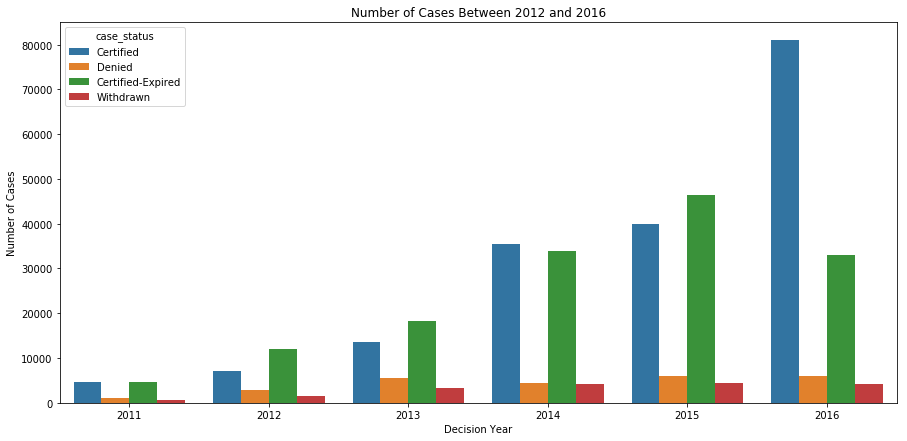

In [14]:
# Retreiving year from decision_date and plotting case status between 2012 and 2016
visa_treated['decision_year'] = visa_treated['decision_date'].dt.year

plt.subplots(figsize=(15,7))
sns.countplot(x=visa_treated["decision_year"], hue=visa_treated["case_status"])
plt.xlabel("Decision Year")
plt.ylabel("Number of Cases")
plt.title("Number of Cases Between 2012 and 2016")

Good news, again! Time is favorable for us. Number of certified case is increasing every year.

### 1.2.3. Visa Types

In [15]:
visa_treated["dummy"]= 1
visa_class1 = visa_treated.groupby(["class_of_admission"], as_index= True).sum()

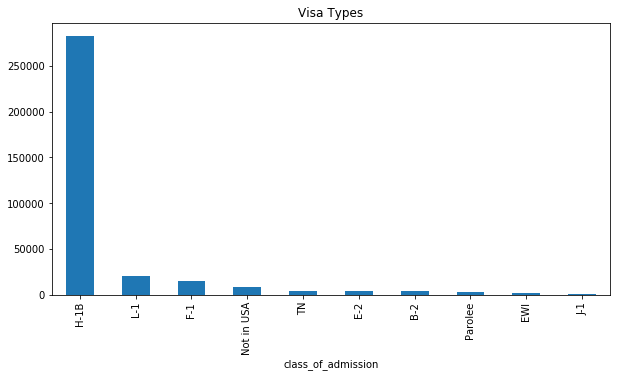

In [16]:
plt.subplots(figsize= (10,5))
visa_class1.sort_values(by="dummy", axis=0, ascending=False).head(10)["dummy"].plot(kind="bar", title= "Visa Types")

Permanent visa applicants are usually H-1B visa-holders.
Let's see case status for it.

### 1.2.4. H-1B

Text(0.5,1,'Case Status in H-1B')

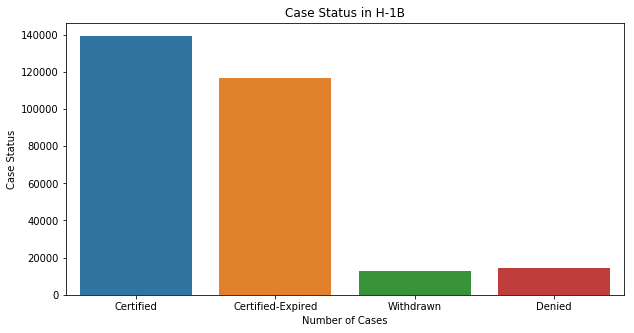

In [17]:
plt.figure(figsize=(10,5))

sns.countplot(visa_treated[visa_treated["class_of_admission"] == "H-1B"]["case_status"])

plt.xlabel("Number of Cases")
plt.ylabel("Case Status")
plt.title("Case Status in H-1B")

H-1B has a small number of denied cases.

## 1.3. General Information

### 1.3.1. States

In [18]:
## Since employer_state has short and long version of state name, i.e. CA and CALIFORNIA, we will use long version.

states = {'AL':'ALABAMA',
                   'AK':'ALASKA',
                   'AZ':'ARIZONA',
                   'AR':'ARKANSAS',
                   'CA':'CALIFORNIA',
                   'CO':'COLORADO',
                   'CT':'CONNECTICUT',
                   'DE':'DELAWARE',
                   'DC':'DISTRICT OF COLUMBIA',
                   'FL':'FLORIDA', 
                   'GA':'GEORGIA',
                   'HI':'HAWAII',
                   'ID':'IDAHO',
                   'IL':'ILLINOIS',
                   'IN':'INDIANA',
                   'IA':'IOWA',
                   'KS':'KANSAS',
                   'KY':'KENTUCKY',
                   'LA':'LOUISIANA',
                   'ME':'MAINE',
                   'MD':'MARYLAND',
                   'MA':'MASSACHUSETTS',
                   'MI':'MICHIGAN',
                   'MN':'MINNESOTA',
                   'MS':'MISSISSIPPI',
                   'MO':'MISSOURI',
                   'MT':'MONTANA',
                   'NE':'NEBRASKA',
                   'NV':'NEVADA',
                   'NH':'NEW HAMPSHIRE',
                   'NJ':'NEW JERSEY',
                   'NM':'NEW MEXICO',
                   'NY':'NEW YORK',
                   'NC':'NORTH CAROLINA',
                   'ND':'NORTH DAKOTA',
                   'OH':'OHIO',
                   'OK':'OKLAHOMA',
                   'OR':'OREGON',
                   'PA':'PENNSYLVANIA',
                   'RI':'RHODE ISLAND',
                   'SC':'SOUTH CAROLINA',
                   'SD':'SOUTH DAKOTA',
                   'TN':'TENNESSEE',
                   'TX':'TEXAS',
                   'UT':'UTAH',
                   'VT':'VERMONT',
                   'VI':'VIRGIN ISLANDS',
                   'VA':'VIRGINIA',
                   'WA':'WASHINGTON',
                   'WV':'WEST VIRGINIA',
                   'WI':'WISCONSIN',
                   'WY':'WYOMING' }

##visa_treated["employer_state"] = visa_treated["employer_state"].str.strip
visa_treated["employer_state"] = visa_treated["employer_state"].str.upper().map(states)

In [19]:
## Checking whether there is short version of states left.
## visa_treated["employer_state"].unique()

Text(0.5,1,'Number of Applications in States')

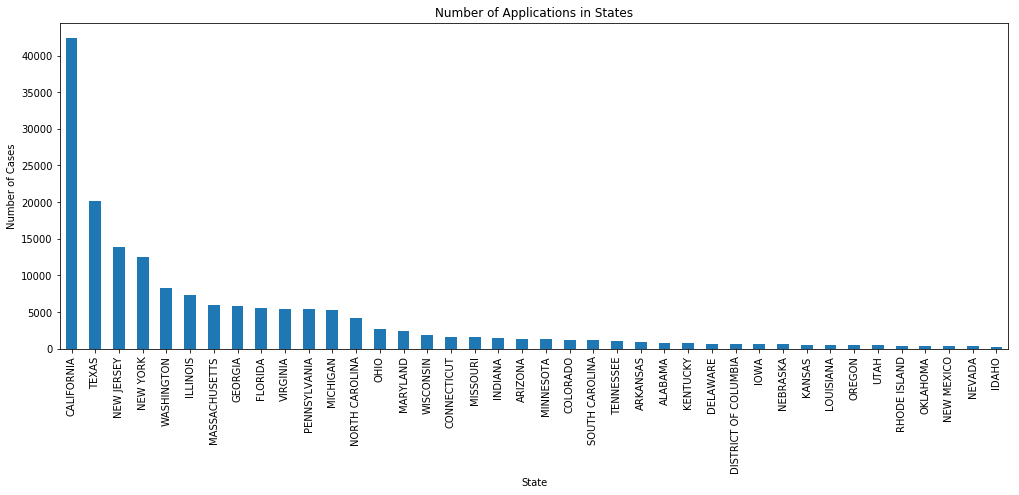

In [20]:
top_15_state = visa_treated["employer_state"].value_counts().head(40)

plt.subplots(figsize= (17,6))
top_15_state.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Number of Cases")
plt.title("Number of Applications in States")

In [21]:
##certified = visa_treated[visa_treated["case_status"] == "Certified"]
##denied = visa_treated[visa_treated["case_status"] == "Denied"]

Text(0.5,1,'Certified Cases in States')

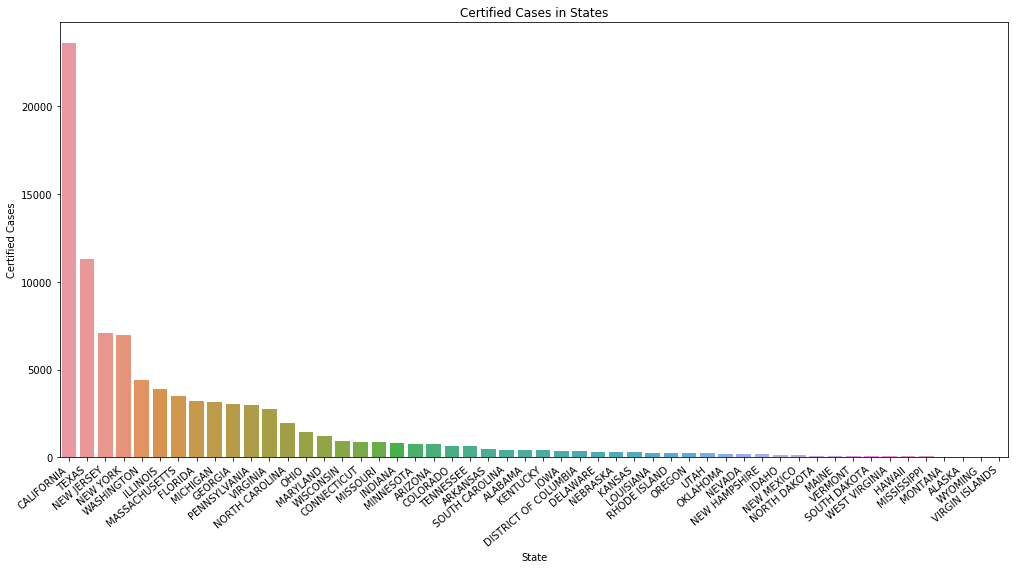

In [22]:
##Certified Cases in States

plt.subplots(figsize= (17,8))
ax = sns.countplot(visa_treated["employer_state"][visa_treated["case_status"] == "Certified"],
                   order = visa_treated["employer_state"][visa_treated["case_status"] == "Certified"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("State")
plt.ylabel("Certified Cases")
plt.title("Certified Cases in States")

Text(0.5,1,'Denied Cases in States')

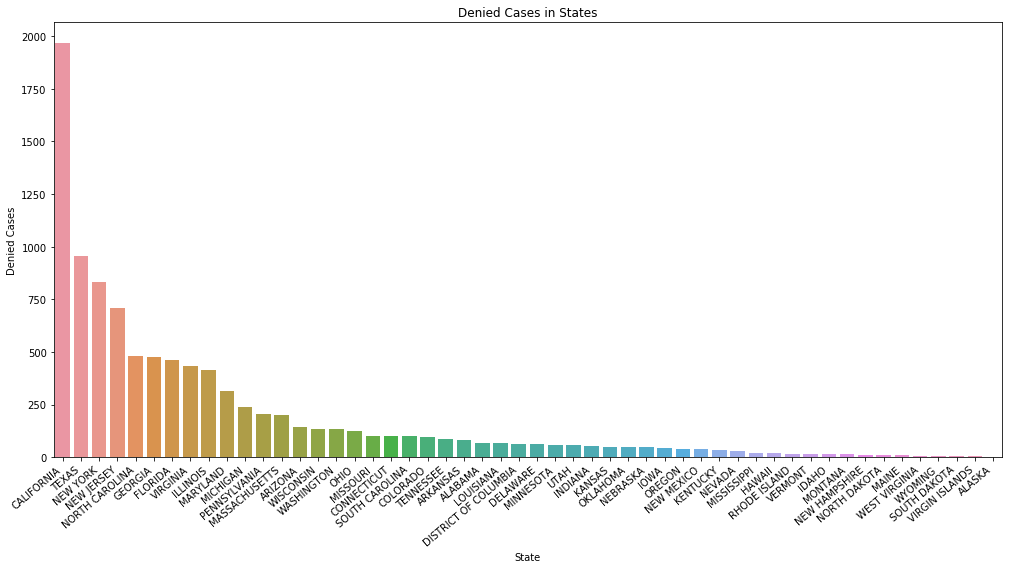

In [23]:
plt.subplots(figsize= (17,8))
ax = sns.countplot(visa_treated["employer_state"][visa_treated["case_status"] == "Denied"],
                   order = visa_treated["employer_state"][visa_treated["case_status"] == "Denied"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.xlabel("State")
plt.ylabel("Denied Cases")
plt.title("Denied Cases in States")

In [24]:
visa_class2 = visa_treated.groupby(["employer_state","case_status"], as_index= False).sum()
visa_class2.head()

,employer_state,case_status,decision_year,dummy
0,ALABAMA,Certified,870659,432
1,ALABAMA,Certified-Expired,596476,296
2,ALABAMA,Denied,141059,70
3,ALABAMA,Withdrawn,50366,25
4,ALASKA,Certified,58429,29


In [25]:
## Checking Certified/Denied ratio in states


status_in_states=pd.DataFrame(0,index=visa_class2["employer_state"].unique(), columns=["Certified","Denied"])

for state in visa_class2["employer_state"].unique():
    status_in_states.loc[state]["Certified"] = visa_class2[(visa_class2["employer_state"] == state) & (visa_class2["case_status"] == "Certified")]["dummy"]
    status_in_states.loc[state]["Denied"] = visa_class2[(visa_class2["employer_state"] == state) & (visa_class2["case_status"] == "Denied")]["dummy"]
    
status_in_states["Ratio"] = list(map(lambda x,y: x/y, status_in_states["Certified"],status_in_states["Denied"]))

status_in_states.head()

,Certified,Denied,Ratio
ALABAMA,432,70,6.171429
ALASKA,29,3,9.666667
ARIZONA,744,142,5.239437
ARKANSAS,445,84,5.297619
CALIFORNIA,23602,1967,11.998983


Text(0.5,1,'Certified/Denied Ratio in 40 States')

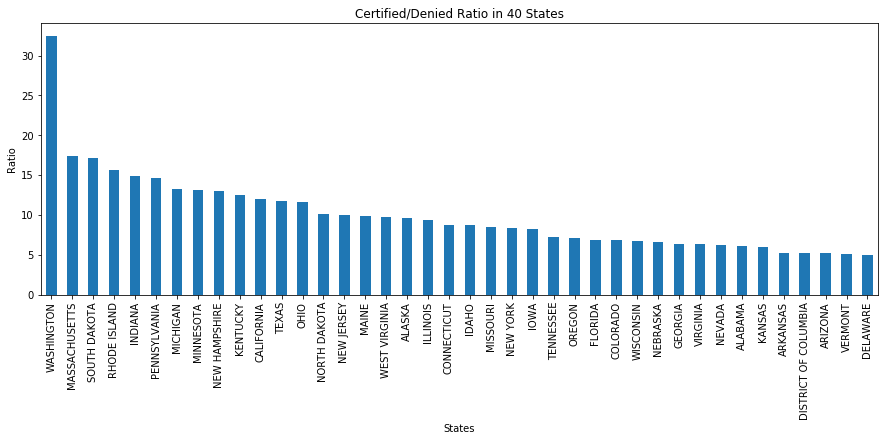

In [26]:
plt.figure(figsize=(15,5))

status_in_states.sort_values(by="Ratio", axis=0, ascending=False).head(40)["Ratio"].plot(kind="bar")
plt.xlabel("States")
plt.ylabel("Ratio")
plt.title("Certified/Denied Ratio in 40 States")

Ratios should be interpreted carefully. There are many applications in Washington and Massachusetts so ratios give reasonable results. However; South Dakota, Rhode Island and Indiana have few applications so it is better to be cognizant to interpret ratios of those states.

### 1.3.2. Cities

Text(0.5,1,'Number of Cases for Cities')

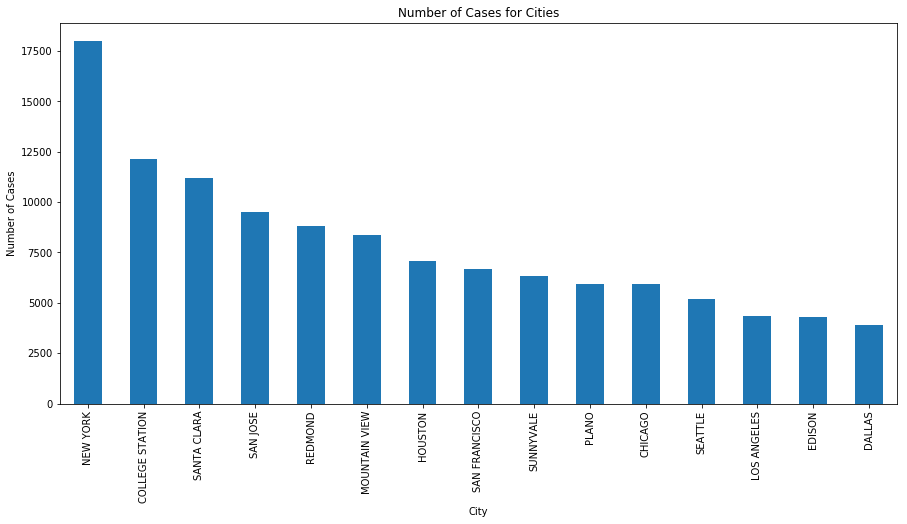

In [27]:
visa_treated["employer_city"] = visa_treated["employer_city"].str.upper()

plt.figure(figsize=(15,7))
visa_treated["employer_city"].value_counts().head(15).plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Number of Cases")
plt.title("Number of Cases for Cities")

## Try to use world map

Though number one is New York, California (Santa Clara, San Jose, Redmond, Mountain View, San Francisco, Sunnyvale, Los Angeles) and Texas (College Station, Houston, Plano, Dallas) are dominant in the list. 
Remember that New Jersey was in the high rank, that is why we see Edison in this list.

### 1.3.3. Sectors

In [28]:
## Analyzing top 15 sectos

top_15_sectors = visa_treated["us_economic_sector"].value_counts().head(15)
top_15_sectors_certified = visa_treated["us_economic_sector"][visa_treated["case_status"] == "Certified"].value_counts().head(15)
top_15_sectors_denied = visa_treated["us_economic_sector"][visa_treated["case_status"] == "Denied"].value_counts().head(15)
top_15_sectors_withdrawn = visa_treated["us_economic_sector"][visa_treated["case_status"] == "Withdrawn"].value_counts().head(15)

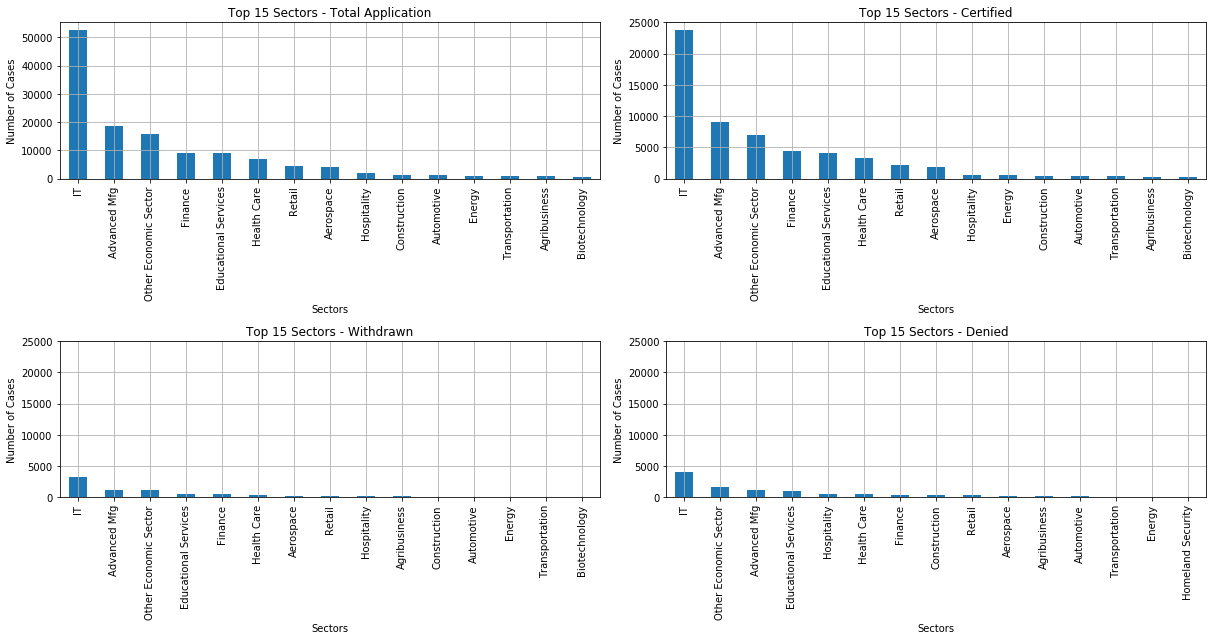

In [29]:
## Y-axis of "Certified", "Withdrawn" and "Denied" graphs are limited by 25.000 so that we can also visually compare them. 

plt.subplots(figsize=(17,9))

plt.subplot(221)
top_15_sectors.plot(kind="bar")
plt.xlabel("Sectors")
plt.ylabel("Number of Cases")
plt.title("Top 15 Sectors - Total Application")
plt.grid(True)

plt.subplot(222)
top_15_sectors_certified.plot(kind="bar")
plt.xlabel("Sectors")
plt.ylabel("Number of Cases")
plt.title("Top 15 Sectors - Certified")
plt.ylim(0,25000)
plt.grid(True)

plt.subplot(223)
top_15_sectors_withdrawn.plot(kind="bar")
plt.xlabel("Sectors")
plt.ylabel("Number of Cases")
plt.title("Top 15 Sectors - Withdrawn")
plt.ylim(0,25000)
plt.grid(True)

plt.subplot(224)
top_15_sectors_denied.plot(kind="bar")
plt.xlabel("Sectors")
plt.ylabel("Number of Cases")
plt.title("Top 15 Sectors - Denied")
plt.ylim(0,25000)
plt.grid(True)

plt.tight_layout()

As expected, IT is the number one. 

### 1.3.4. Companies

Text(0.5,1,'Top 15 H1B Applicant Company')

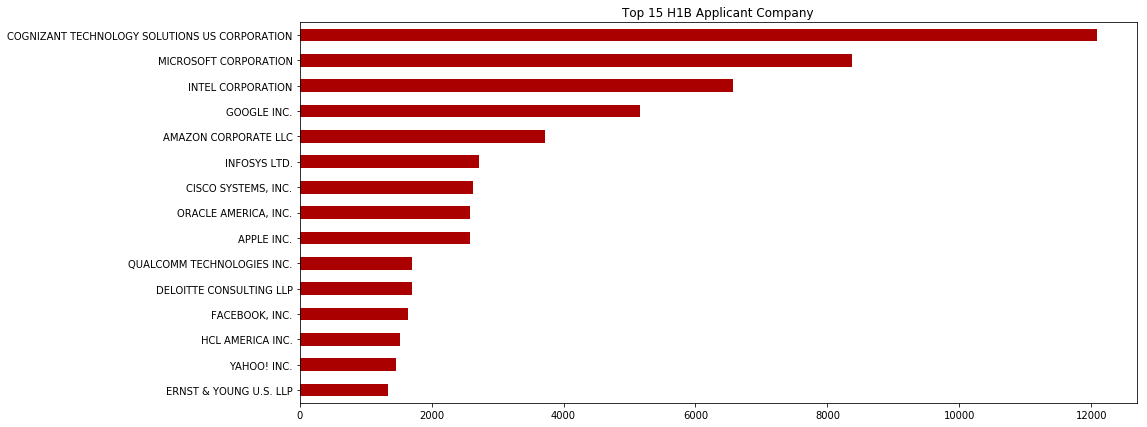

In [30]:
visa_treated["employer_name"].value_counts().iloc[:15].plot(kind="barh", figsize=(15,7), facecolor='#AA0000').invert_yaxis()
plt.title("Top 15 H1B Applicant Company")

This is an interesting insight! Cognizant Technology Solution US Corporation is the number one. 
We expected a company in California, not in Texas. Yet, this discovery is consistent with that Texas is the second state. <br>

No wonder why College Station is the second city, in the city level analysis. Headquarter of Cognizant Technology Solution US Corporation is College Station, TX.

## 1.4. Applicants

### 1.4.1. Citizenship

Text(0.5,1,'Citizenship of Applicants')

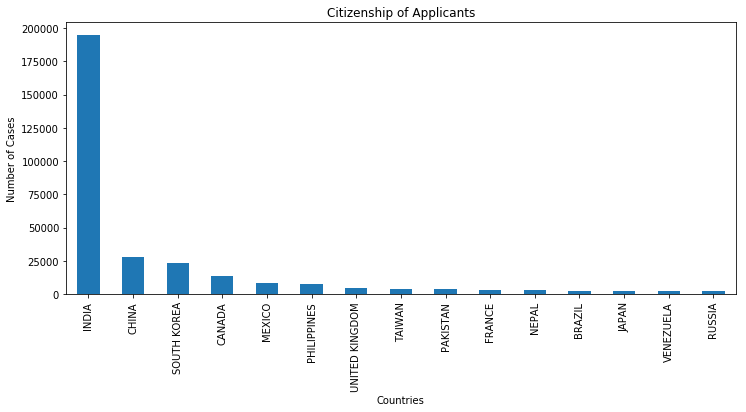

In [31]:
top_15_countries = visa_treated["country_of_citizenship"].value_counts().head(15)

plt.subplots(figsize= (12,5))
top_15_countries.plot(kind="bar")
plt.xlabel("Countries")
plt.ylabel("Number of Cases")
plt.title("Citizenship of Applicants")

India and China are expected to be number one and number two. However, it is surprising that India is way ahead of other states. 
People who get permenant visa are usually from East Asia. UK and France are the only countries from Europe. There is no African country in the list. 

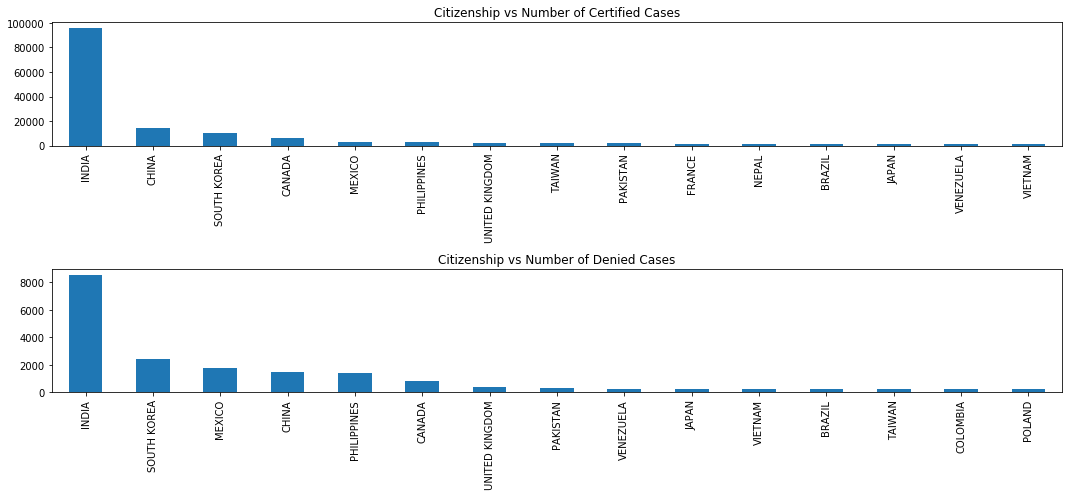

In [32]:
top_15_countries_certified = visa_treated["country_of_citizenship"][visa_treated["case_status"] == "Certified"].value_counts().head(15)
top_15_countries_denied = visa_treated["country_of_citizenship"][visa_treated["case_status"] == "Denied"].value_counts().head(15)

fig, (ax1, ax2) = plt.subplots(figsize= (15,7), nrows=2, ncols=1)

top_15_countries_certified.plot(kind="bar", ax=ax1, title="Citizenship vs Number of Certified Cases")
top_15_countries_denied.plot(kind="bar", ax=ax2, title="Citizenship vs Number of Denied Cases")

plt.tight_layout()

### 1.4.2. Education

In [33]:
## Checking unique education information
visa_treated["foreign_worker_info_education"].unique()

array([nan, "Bachelor's", 'None', 'Doctorate', "Master's", 'Other',
       'High School', "Associate's"], dtype=object)

In [34]:
visa_treated["foreign_worker_info_education"].fillna(value= "None", inplace=True)

Text(0.5,1,'Education Information')

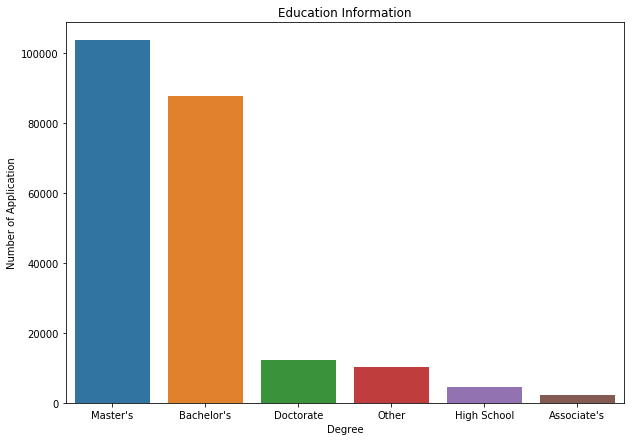

In [35]:
plt.subplots(figsize=(10,7))
sns.countplot(x=visa_treated[visa_treated["foreign_worker_info_education"] != "None"]["foreign_worker_info_education"], 
              order=["Master's","Bachelor's","Doctorate","Other","High School","Associate's"])
plt.xlabel("Degree")
plt.ylabel("Number of Application")
plt.title("Education Information")

### 1.4.3. Titles

Because of capital letters, hypens, spaces etc. in job titles, job_info_job_title column should be treated.

In [36]:
visa["job_info_job_title"] = visa_treated["job_info_job_title"].str.lower()
visa["job_info_job_title"] = visa_treated["job_info_job_title"].str.replace("sr.", "")
visa["job_info_job_title"] = visa_treated["job_info_job_title"].str.replace("sr", "")
visa["job_info_job_title"] = visa_treated["job_info_job_title"].str.replace("senior", "")
visa["job_info_job_title"] = visa_treated["job_info_job_title"].str.replace("Senior", "")
visa["job_info_job_title"] = visa_treated["job_info_job_title"].str.replace("-", "") 
visa["job_info_job_title"] = visa_treated["job_info_job_title"].str.replace(",", " ") 

In [37]:
top_15_job_titles = visa_treated["job_info_job_title"].value_counts().head(15)
top_15_job_titles_certified = visa_treated["job_info_job_title"][visa_treated["case_status"] == "Certified"].value_counts().head(15)
top_15_job_titles_denied = visa_treated["job_info_job_title"][visa_treated["case_status"] == "Denied"].value_counts().head(15)
top_15_job_titles_withdrawn = visa_treated["job_info_job_title"][visa_treated["case_status"] == "Withdrawn"].value_counts().head(15)

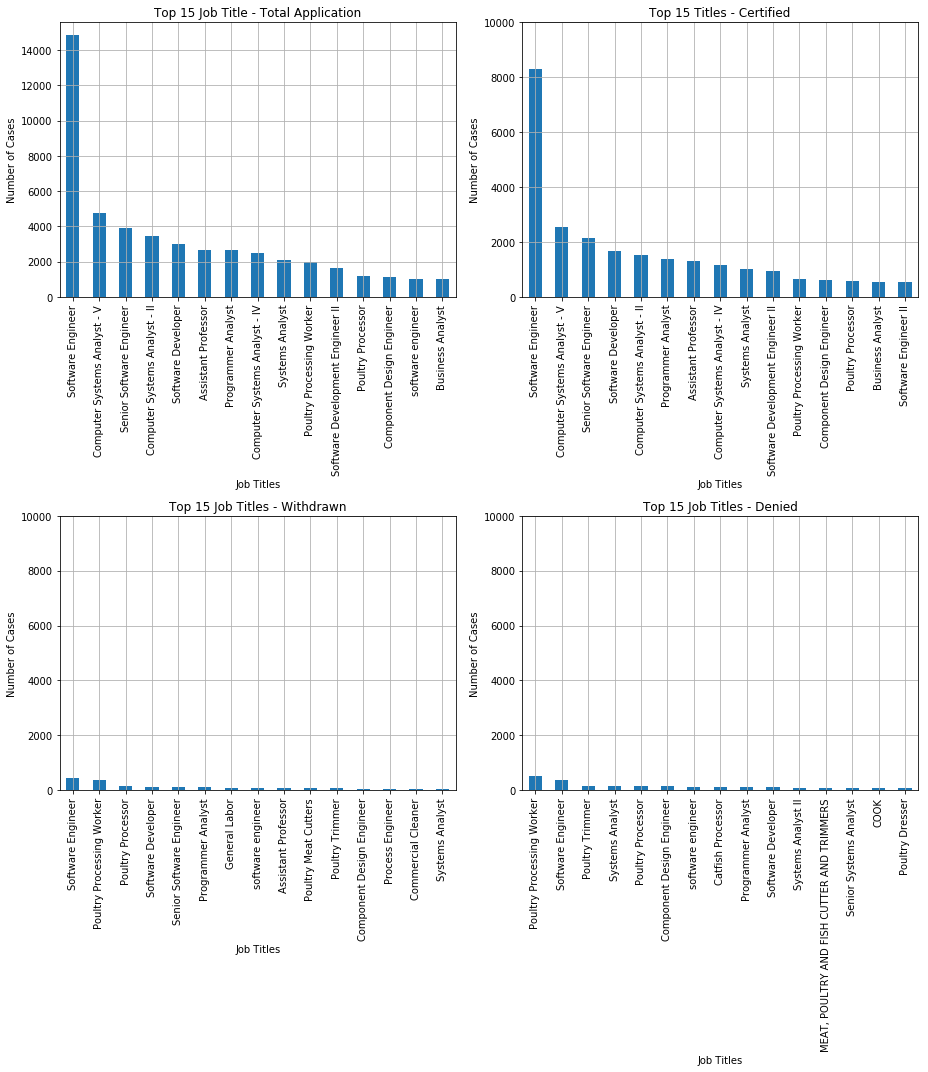

In [38]:
## Y-axis of "Certified", "Withdrawn" and "Denied" graphs are limited by 25.000 so that we can also visually compare them. 

plt.figure(figsize=(13,15))

plt.subplot(221)
top_15_job_titles.plot(kind="bar")
plt.xlabel("Job Titles")
plt.ylabel("Number of Cases")
plt.title("Top 15 Job Title - Total Application")
plt.grid(True)

plt.subplot(222)
top_15_job_titles_certified.plot(kind="bar")
plt.xlabel("Job Titles")
plt.ylabel("Number of Cases")
plt.title("Top 15 Titles - Certified")
plt.ylim(0,10000)
plt.grid(True)

plt.subplot(223)
top_15_job_titles_withdrawn.plot(kind="bar")
plt.xlabel("Job Titles")
plt.ylabel("Number of Cases")
plt.title("Top 15 Job Titles - Withdrawn")
plt.ylim(0,10000)
plt.grid(True)

plt.subplot(224)
top_15_job_titles_denied.plot(kind="bar")
plt.xlabel("Job Titles")
plt.ylabel("Number of Cases")
plt.title("Top 15 Job Titles - Denied")
plt.ylim(0,10000)
plt.grid(True)

plt.tight_layout()

Since the companies are mainly tech companies and IT is the number one industry, as expected, job titles are relevant with them.

### 1.4.5. Salary Range

In [39]:
visa_treated["pw_amount_9089"] = visa_treated["pw_amount_9089"].str.replace(",", "").astype(float)

In [40]:
#Dividing our continuous income values into some categories to facilitate their visualization
visa_treated['remuneration'] = pd.cut(visa_treated['pw_amount_9089'], [0,20000,40000,60000,80000,100000,120000,140000,160000,180000,
                                                                       200000,220000,240000, 260000, 280000, 30000000],
                                                                      right=False, labels=["0-20k", "20k-40k","40k-60k","60k-80k","80k-100k",
                                                                      "100k-120k","120k-140k","140k-160k","160k-180k","180k-200k",
                                                                      "200k-220k","220k-240k","240k-260k", "260k-280k", "+280k"])
salary = visa_treated['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]
##495748000

0-20k         17338
20k-40k       19349
40k-60k       37905
60k-80k       81648
80k-100k     104219
100k-120k     68301
120k-140k     26489
140k-160k      9034
160k-180k      3610
180k-200k      2937
200k-220k       967
220k-240k       270
240k-260k        30
260k-280k         2
+280k            47
Name: remuneration, dtype: int64

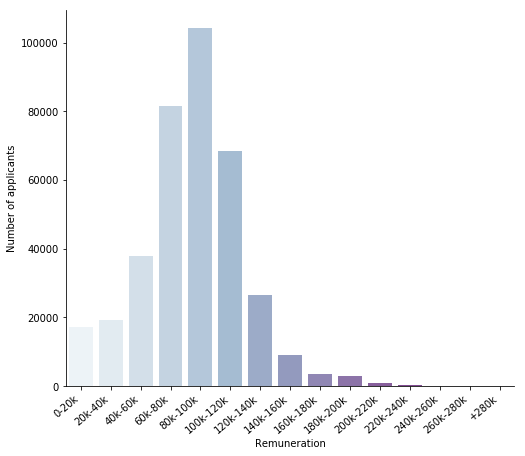

In [41]:
# Draw a count plot to show the distribution of remunerations
s = sns.factorplot(x='remuneration', data=visa_treated, kind="count",
                   palette="BuPu", size=6, aspect=1.2)
s.set_xticklabels(rotation=40, ha="right")
s.set(xlabel='Remuneration', ylabel='Number of applicants')

Note that we evaluated salaries together though payment period varies. However, annual payment dominates, as we will see in the next section, this approach does not affect histrogram, significantly.

In [42]:
visa_treated["pw_amount_9089"].max()

13528320.0

### 1.4.5. Payment Type

In [43]:
## Checking payment type 
visa_treated["pw_unit_of_pay_9089"].unique()

array(['yr', 'hr', nan, 'bi', 'mth', 'wk', 'Hour', 'Year', 'Bi-Weekly',
       'Week', 'Month'], dtype=object)

In [44]:
period = {"yr": "annual", "hr": "hourly", "bi": "bi-weekly", "mth": "monthly", "wk": "weekly", "Hour": "hourly",
        "Year": "annual", "Bi-Weekly": "bi-weekly", "Week": "weekly", "Month": "monthly",  "nan": "nan"}

visa_treated["pw_unit_of_pay_9089"] = visa_treated["pw_unit_of_pay_9089"].map(period)

In [45]:
visa_treated["pw_unit_of_pay_9089"].value_counts()

annual       364080
hourly         8345
weekly          207
monthly         130
bi-weekly        28
Name: pw_unit_of_pay_9089, dtype: int64

## 2. Modelling

### 2.1. Imputation

In [50]:
## Filling missing valaues with mode for categorical variable and with median with numerical variables

visa_treated.fillna({'class_of_admission': visa_treated["class_of_admission"].mode()[0],
                     'country_of_citizenship': visa_treated["country_of_citizenship"].mode()[0],
                     'us_economic_sector': visa_treated["us_economic_sector"].mode()[0],
                     'pw_amount_9089': visa_treated["pw_amount_9089"].median(),
                     'pw_unit_of_pay_9089': visa_treated["pw_unit_of_pay_9089"].mode()[0],
                     'pw_soc_code': visa_treated["pw_soc_code"].mode()[0],
                     'employer_state': visa_treated["employer_state"].mode()[0],
                     'employer_city': visa_treated["employer_city"].mode()[0],
                     'job_info_job_title': visa_treated["job_info_job_title"].mode()[0],
                     'us_economic_sector': visa_treated["us_economic_sector"].mode()[0],
                    'remuneration': visa_treated["remuneration"].mode()[0]}, 
                    inplace=True)

,class_of_admission,country_of_citizenship,pw_amount_9089,pw_unit_of_pay_9089,pw_soc_code,employer_state,employer_city,employer_name,decision_date,case_status,job_info_job_title,us_economic_sector,foreign_worker_info_education,decision_year,dummy,remuneration
0,J-1,INDIA,75629.00,annual,15-1031.00,NEW YORK,NEW YORK,NETSOFT USA INC.,2012-02-01,Certified,Software Engineer,IT,None,2012,1,60k-80k
1,B-2,INDIA,37024.00,annual,47-4041.00,NEW YORK,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,2011-12-21,Denied,Software Engineer,Other Economic Sector,None,2011,1,20k-40k
2,H-1B,INDIA,47923.00,annual,17-2051.00,VIRGINIA,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",2011-12-01,Certified,Software Engineer,Aerospace,None,2011,1,40k-60k
3,B-2,INDIA,10.97,hourly,43-4071.00,NEW YORK,FLUSHING,EBENEZER MISSION CHURCH,2011-12-01,Certified,Software Engineer,Other Economic Sector,None,2011,1,0-20k
4,L-1,INDIA,94890.00,annual,41-9031.00,NEW YORK,ALBANY,ALBANY INTERNATIONAL CORP.,2012-01-26,Certified,Software Engineer,Advanced Mfg,None,2012,1,80k-100k
5,EWI,INDIA,37024.00,annual,47-4041.00,NEW YORK,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,2012-01-26,Denied,Software Engineer,Other Economic Sector,None,2012,1,20k-40k
6,H-1B,INDIA,47083.33,annual,25-2031.00,NEW YORK,TROY,EMMA WILLARD SCHOOL,2011-10-07,Certified-Expired,Software Engineer,Educational Services,None,2011,1,40k-60k
7,E-2,INDIA,36733.00,annual,13-1051.00,FLORIDA,POMPANO BEACH,FDS ALUMINUM LLC,2012-02-06,Denied,Software Engineer,Advanced Mfg,None,2012,1,20k-40k
8,H-1B,INDIA,44824.00,annual,15-1051.00,DELAWARE,WILMINGTON,ELECTRONIC DATA SYSTEMS CORPORATION,2012-02-29,Certified,Software Engineer,IT,None,2012,1,40k-60k
9,E-2,INDIA,12.86,hourly,41-1011.00,NEW YORK,BROOKLYN,"AMER BROTHERS INTERNATIONAL, INC.",2012-03-30,Denied,Software Engineer,Retail,None,2012,1,0-20k


In [51]:
## Since we combined none and nan in the previous steps, we will impute them by "Master's", which is the most frequent category.

visa_treated[visa_treated["foreign_worker_info_education"] == "None"]["foreign_worker_info_education"] = "Master's"

In [52]:
## Establishing X and y to fit models.

X = visa_treated.drop(["employer_name","employer_state","decision_date",
                               "job_info_job_title","case_status","decision_year","dummy"], axis=1)
y= visa_treated["case_status"]

### 2.2. Label Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
for column in X.columns:
    X_le = LabelEncoder()
    X_le.fit(X[column])
    X[column] = X_le.transform(X[column])

In [55]:
y_le = LabelEncoder()
y_le.fit(y)
y = y_le.transform(y)

We will fit different models and compare scores. (K-Nearest Neighbors, Logistic Regression, Random Forest Classifier and Decision Tree Classifier)

### 2.3. Modelling with K-Means Clustering

### 2.3.1. K-Means Clustering

In [56]:
import pylab as pl
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
from copy import deepcopy

In [57]:
from sklearn.cluster import KMeans

In [58]:
cluster_numbers = range(1, 10)

In [59]:
kmeans = [KMeans(n_clusters=i) for i in cluster_numbers]
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

In [60]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

[-13017642426681.18,
 -5098405980129.2041,
 -2711280104006.0547,
 -1981428512553.5095,
 -1642293408089.9443,
 -1378383236088.8279,
 -1192586239212.4331,
 -1012691575511.9702,
 -885296340150.88306]

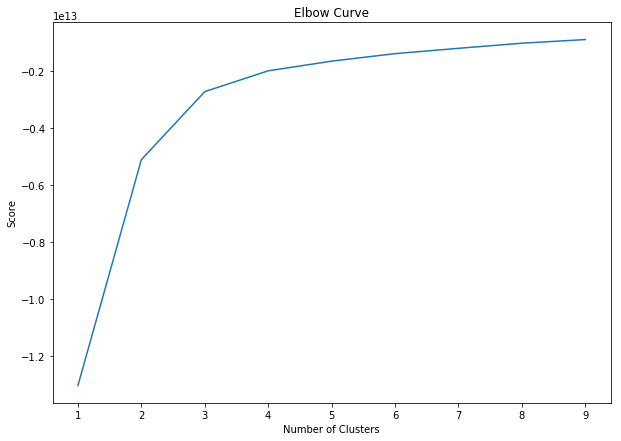

In [62]:
plt.subplots(figsize=(10,7))
plt.plot(cluster_numbers,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [64]:
predictions = kmeans.predict(X)

In [65]:
labels = kmeans.labels_
labels

array([1, 2, 2, ..., 3, 2, 3])

In [66]:
centers = kmeans.cluster_centers_
centers

array([[  2.05945617e+01,   8.36572488e+01,   2.03516364e+04,
          2.38000388e-03,   2.05250636e+02,   3.19055156e+03,
          1.20053320e+01,   3.47254824e+00,   2.75612621e+00],
       [  1.98599461e+01,   8.79131193e+01,   1.04986706e+04,
          1.24283264e-02,   2.35535898e+02,   2.68535817e+03,
          1.16713355e+01,   3.63660867e+00,   1.28290223e+01],
       [  1.99870746e+01,   1.15165134e+02,   3.79634627e+03,
          2.77986966e-01,   6.78765985e+02,   2.87319736e+03,
          1.16108436e+01,   3.97670167e+00,   7.14637944e+00],
       [  2.01044481e+01,   8.30227017e+01,   1.50676688e+04,
          9.05216530e-03,   1.97857347e+02,   3.14941080e+03,
          1.18791171e+01,   3.68719274e+00,   1.26045152e+01]])

### 2.3.2. Plotting with Two Features

In [67]:
X.columns

Index(['class_of_admission', 'country_of_citizenship', 'pw_amount_9089',
       'pw_unit_of_pay_9089', 'pw_soc_code', 'employer_city',
       'us_economic_sector', 'foreign_worker_info_education', 'remuneration'],
      dtype='object')

In [68]:
## K Means Clustering Plot with two features. Let's use pw_soc_code and employer_city.
X_2D = X[["pw_soc_code", "employer_city"]]

In [69]:
kmeans_2D = KMeans(n_clusters=4, random_state=0).fit(X_2D)

In [70]:
predictions_2D = kmeans_2D.predict(X_2D)

In [71]:
labels_2D = kmeans_2D.labels_
labels_2D

array([2, 3, 1, ..., 0, 2, 0])

In [72]:
centers_2D = kmeans_2D.cluster_centers_
centers_2D

array([[  275.68612616,  4717.81775435],
       [  304.3840675 ,  2086.23269466],
       [  272.86523425,  3509.10785847],
       [  280.42781221,   770.95693832]])

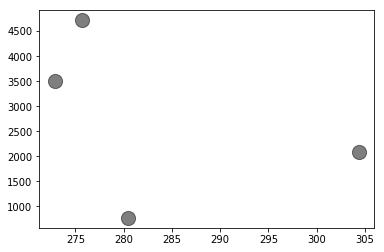

In [73]:
## Plotting centers
plt.scatter(centers_2D[:, 0], centers_2D[:, 1], c='black', s=200, alpha=0.5);

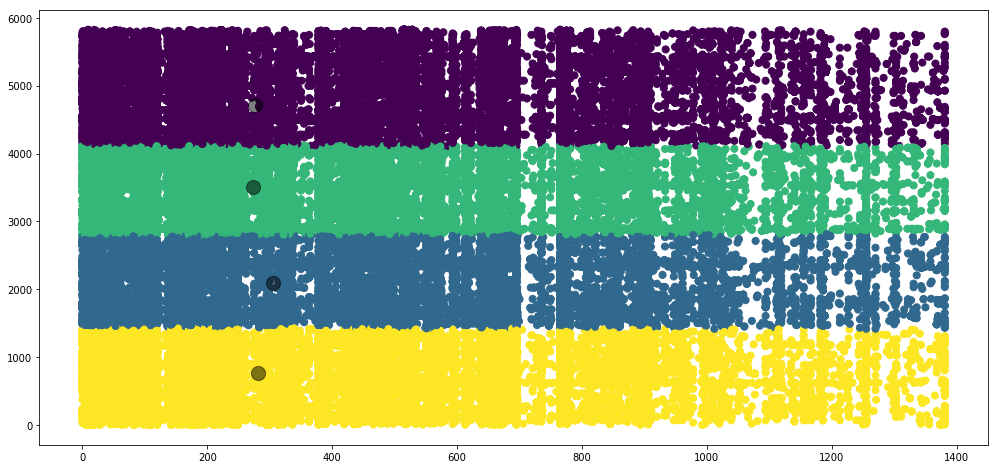

In [74]:
## Plotting K Means Clustering
plt.subplots(figsize=(17,8))
plt.scatter(X_2D.iloc[:, 0], X_2D.iloc[:, 1], c=predictions_2D, s=50, cmap='viridis')
plt.scatter(centers_2D[:, 0], centers_2D[:, 1], c='black', s=200, alpha=0.5);

In the first plot, x-axis range is between 250 and 305 so centers can be seen separately. In the second plot, x-axis range is between 0 and 1400, that's why centers look as if they are at the same x-axis value, but actually not as we see in the first plot.
Note that there are more than 700k data points in the plot.

### 2.3.3. Silhouette Plot for Two Features

In [75]:
km = KMeans(n_clusters=4,
             init='k-means++',
             n_init=10,
             max_iter=300,
             tol=1e-04,
             random_state=0)

In [76]:
y_km = km.fit_predict(X_2D)

In [77]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

In [79]:
silhouette_vals = silhouette_samples(X_2D, y_km, metric="euclidean")

In [80]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

In [82]:
for i, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[y_km == c]
     c_silhouette_vals.sort()    

In [84]:
y_ax_upper += len(c_silhouette_vals)
color = cm.jet(float(i)/n_clusters)

plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height = 1.0, edgecolor = 'none', color = color)

yticks.append((y_ax_lower + y_ax_upper)/2.)
y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,color="blue",linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.show()